In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hpd_nyc = pd.read_csv('../nyc_data.csv')
hpd_nyc.head()


,project_id,project_name,program_group,project_start_date,project_completion_date,extended_affordability_status,prevailing_wage_status,extremely_low_income_units,very_low_income,low_income_units,moderate_income,middle_income,other,counted_rental_units,counted_homeownership_units,all_counted_units,total_units,senior_units,planned_tax_benefit
0,60912,CONFIDENTIAL,Confidential,2016-04-29T00:00:00.000,2016-04-29T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
1,60914,CONFIDENTIAL,Confidential,2016-04-18T00:00:00.000,2016-04-18T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
2,60917,CONFIDENTIAL,Confidential,2016-04-19T00:00:00.000,2016-04-19T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
3,60919,CONFIDENTIAL,Confidential,2016-04-26T00:00:00.000,2016-04-26T00:00:00.000,No,Non Prevailing Wage,0,0,1,0,0,0,0,1,1,1,0,NaN
4,60963,FAC. 6309 FOURTH AVENUE,Multifamily Finance Program,2019-11-26T00:00:00.000,2023-04-18T00:00:00.000,No,Prevailing Wage,83,0,0,0,0,1,84,0,84,84,83,420c


In [2]:
hpd_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3634 entries, 0 to 3633
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   project_id                     3634 non-null   int64 
 1   project_name                   3634 non-null   object
 2   program_group                  3634 non-null   object
 3   project_start_date             3634 non-null   object
 4   project_completion_date        2660 non-null   object
 5   extended_affordability_status  3634 non-null   object
 6   prevailing_wage_status         3634 non-null   object
 7   extremely_low_income_units     3634 non-null   int64 
 8   very_low_income                3634 non-null   int64 
 9   low_income_units               3634 non-null   int64 
 10  moderate_income                3634 non-null   int64 
 11  middle_income                  3634 non-null   int64 
 12  other                          3634 non-null   int64 
 13  cou

Since there are approximately **1,000 null values** in two columns, we can remove all rows containing these missing values to ensure the data is more accurate. This cleanup step will help maintain data integrity before proceeding with summary statistics using methods like `.describe()`.

In [3]:
hpd_nyc = hpd_nyc.dropna()
hpd_nyc = hpd_nyc.reset_index(drop=True)  
hpd_nyc.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   project_id                     1624 non-null   int64 
 1   project_name                   1624 non-null   object
 2   program_group                  1624 non-null   object
 3   project_start_date             1624 non-null   object
 4   project_completion_date        1624 non-null   object
 5   extended_affordability_status  1624 non-null   object
 6   prevailing_wage_status         1624 non-null   object
 7   extremely_low_income_units     1624 non-null   int64 
 8   very_low_income                1624 non-null   int64 
 9   low_income_units               1624 non-null   int64 
 10  moderate_income                1624 non-null   int64 
 11  middle_income                  1624 non-null   int64 
 12  other                          1624 non-null   int64 
 13  cou

In [4]:
hpd_nyc.describe()

,project_id,extremely_low_income_units,very_low_income,low_income_units,moderate_income,middle_income,other,counted_rental_units,counted_homeownership_units,all_counted_units,total_units,senior_units
count,1624.000000,1624.000000,1624.000000,1624.000000,1624.00000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000
mean,69507.955049,10.244458,20.933498,19.050493,4.51170,9.516010,0.280172,48.211207,16.325123,64.536330,91.655788,4.740764
std,3300.032079,38.803071,303.781982,126.885503,30.56125,29.694248,0.848151,175.716410,391.356853,427.155695,438.142797,23.515728
min,60963.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000
25%,67572.750000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,0.000000,3.000000,10.000000,0.000000
50%,69728.500000,0.000000,0.000000,0.000000,0.00000,3.000000,0.000000,8.000000,0.000000,9.000000,26.000000,0.000000
75%,72217.250000,0.000000,0.000000,5.000000,0.00000,8.000000,0.000000,42.250000,0.000000,45.000000,75.250000,0.000000
max,75468.000000,520.000000,11413.000000,3959.000000,542.00000,455.000000,11.000000,5881.000000,15372.000000,15372.000000,15372.000000,249.000000


At a quick glance, we can observe the distribution of units by income bracket in the buildings within this dataset. Using the mean to determine the average number of units in each category, we find that, on average, buildings have approximately **10 units for extremely low income, 21 for very low income, 19 for low income, 4 for moderate income, and 9 for middle income**. Meanwhile, nearly **0 units** are designated for the "other" income bracket.  

On average, **64 units per building are set aside for affordable housing**, with a total of about **91 units per building**. Whether this distribution is meaningful or useful remains unclear at this stage. The next step is to **review potential outliers** and determine if they significantly impact these results.

## Affordable Units by Income Bracket 

This visualization explores how affordable housing units are distributed across income brackets. It examines which income groups have the most available units and how unit availability varies by building type:

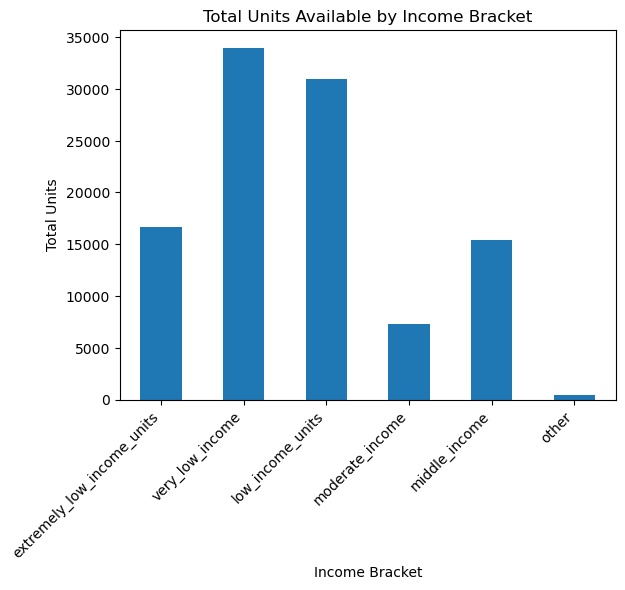

In [5]:
hpd_nyc[['extremely_low_income_units', 'very_low_income', 'low_income_units',
         'moderate_income', 'middle_income', 'other']].sum().plot(kind='bar')

plt.xlabel("Income Bracket")
plt.ylabel("Total Units")
plt.title("Total Units Available by Income Bracket")
plt.xticks(rotation=45, ha="right")
plt.show()


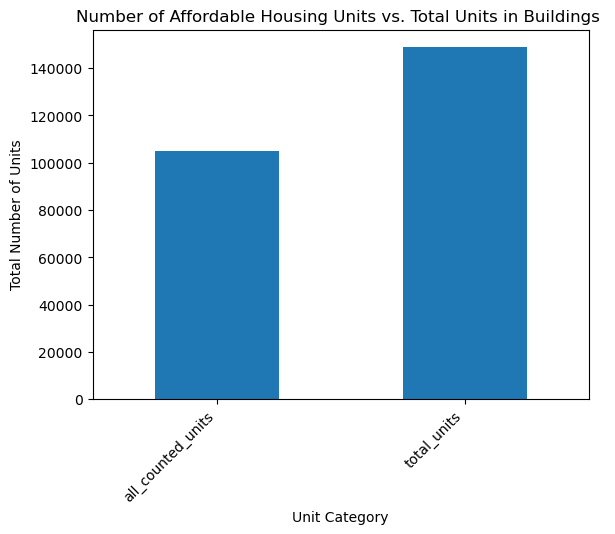

In [6]:
# comparing Total number of units in buildings with number of affordable housing units 

hpd_nyc[['all_counted_units', 'total_units']].sum().plot(kind='bar')

plt.xlabel("Unit Category")
plt.ylabel("Total Number of Units")
plt.title("Number of Affordable Housing Units vs. Total Units in Buildings ")
plt.xticks(rotation=45, ha="right")
plt.show()



The visualizations above are okay, but to better understand the distribution of affordable units per building, we need to examine the proportion of units designated as "affordable." This requires calculating the percentage of affordable units in each building, rather than just looking at raw totals. To do this, we can make a new column for affordability percentage:  

In [7]:
hpd_nyc['affordability_pct'] = (hpd_nyc['all_counted_units'] / hpd_nyc['total_units']) * 100


This way, we can more accurately assess how much of each building's total units are set aside as affordable housing.

**all_counted_units** → Affordable units in a building <br>
**total_units** → Total units in a building<br>

Dividing gives the fraction of affordable units per building.<br>
Multiplying by 100 converts it to a percentage.



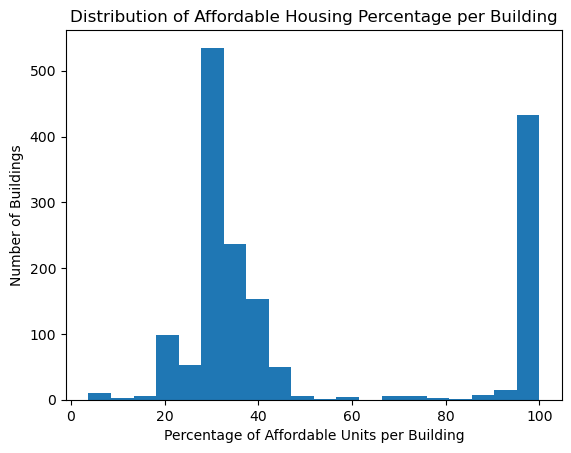

In [9]:
# Plot the distribution of affordable unit percentages
plt.hist(hpd_nyc['affordability_pct'], bins=20)

plt.xlabel("Percentage of Affordable Units per Building")
plt.ylabel("Number of Buildings")
plt.title("Distribution of Affordable Housing Percentage per Building")

plt.show()

Outliers are more apparent here. The histogram shows that some buildings are entirely designated as affordable housing (100% affordable), which makes sense for certain NYC Housing developments. However, the average affordability percentage per building seems to hover around 30%, indicating that most buildings include a mix of affordable and market-rate units."**  

Next steps are to explore more comparisons between market-rate units, affordable units, and other categories to identify potential trends.